In [1]:
import espresso_machine as esma

In [2]:
model = esma.project(project_id='Fe')

In [3]:
model.get_structure(format='poscar')
model.set_pseudo("US")
model.set_cores(8)
model.ecutwfc(60) #Set wavefunction cutoff
model.k_points(6) #Set number of k points
model.degauss(0.05) #Set degauss value
model.conv_thr(1e-6) #Set convergence threshold
model.set_pseudo("US")
model.ecutrho(360)  

In [4]:
model.calculate('vc-relax')
model.get_structure('vc-relax')
model.calculate('scf')

vc-relax is finished
scf is finished


In [5]:
path = ['GAMMA','H','P','GAMMA','N','P','N','H'] #define corners
num_points = 20 #number of points
model.band_points(path,num_points) #define path

bands is finished
bands-pp is finished


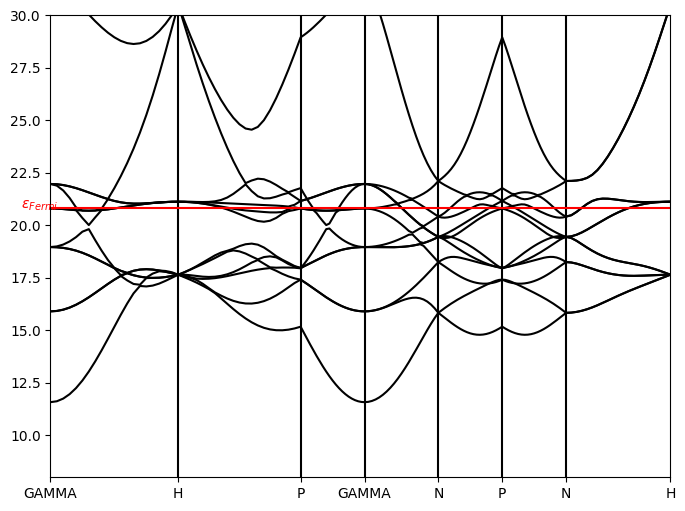

In [6]:
model.calculate('bands')
model.plot('electron',ylim=[8,30]) #plot electron bands

In [12]:
models = model.magnetize(magnetic_atom='Fe')

In [13]:
models[1].config

{'pw': {'control': {'pseudo_dir': './pseudos/US/',
   'calculation': 'bands',
   'outdir': './Projects/Fe/results/',
   'prefix': 'results'},
  'system': {'degauss': 0.05,
   'ecutwfc': 60,
   'occupations': 'smearing',
   'ecutrho': 360,
   'nat': 2,
   'ntyp': 1,
   'ibrav': 0,
   'starting_magnetization(1)': 1,
   'nspin': 2,
   'starting_magnetization(2)': -1},
  'electrons': {'conv_thr': 1e-06},
  'ions': {},
  'cell': {},
  'k_points': '6 6 6 0 0 0',
  'hubbard': {'projection': 'atomic', 'terms': []},
  'cell_parameters': array([[2.73220117, 0.        , 0.        ],
         [0.        , 2.73220117, 0.        ],
         [0.        , 0.        , 2.73220117]]),
  'atomic_positions': array([['Fe1', '0.0000000000', '0.0000000000', '0.0000000000'],
         ['Fe0', '0.5000000000', '0.5000000000', '0.5000000000']],
        dtype='<U12'),
  'atomic_species': [{'atom': 'Fe1',
    'mass': '55.93493633',
    'pseudopotential': 'Fe.UPF'},
   {'atom': 'Fe0', 'mass': '55.93493633', 'pseudopo

bands is finished
bands-pp is finished
bands is finished
bands-pp is finished


ValueError: cannot reshape array of size 400 into shape (6)

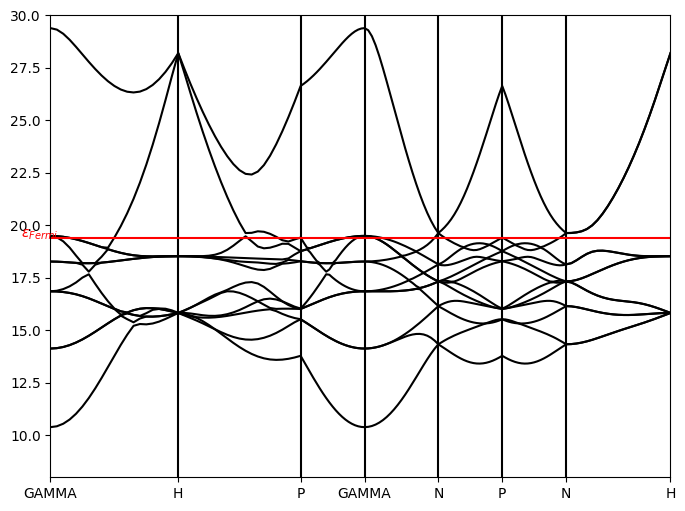

<Figure size 800x600 with 0 Axes>

In [9]:
for state in models:
    state.get_structure('vc-relax')
    state.calculate('bands')
    state.plot('electron',ylim=[8,30]) #plot electron bands

{'pw': {'control': {'pseudo_dir': './pseudos/US/',
   'calculation': 'bands',
   'outdir': './Projects/Fe/afm1/',
   'prefix': 'afm1'},
  'system': {'degauss': 0.05,
   'ecutwfc': 60,
   'occupations': 'smearing',
   'ecutrho': 360,
   'nat': 2,
   'ntyp': 1,
   'ibrav': 0,
   'nspin': 2,
   'starting_magnetization(1)': -1,
   'starting_magnetization(2)': 1},
  'electrons': {'conv_thr': 1e-06},
  'ions': {},
  'cell': {},
  'k_points': '6 6 6 0 0 0',
  'hubbard': {'projection': 'atomic', 'terms': []},
  'cell_parameters': array([[2.73153591, 0.        , 0.        ],
         [0.        , 2.73153591, 0.        ],
         [0.        , 0.        , 2.73153591]]),
  'atomic_positions': array([['Fe1', '0.0000000000', '0.0000000000', '0.0000000000'],
         ['Fe0', '0.5000000000', '0.5000000000', '0.5000000000']],
        dtype='<U12'),
  'atomic_species': [{'atom': 'Fe0',
    'mass': '55.93493633',
    'pseudopotential': 'Fe.UPF'},
   {'atom': 'Fe1', 'mass': '55.93493633', 'pseudopotentia